Using seaborn's built-in Titanic dataset
Dataset Shape: (891, 15)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ K

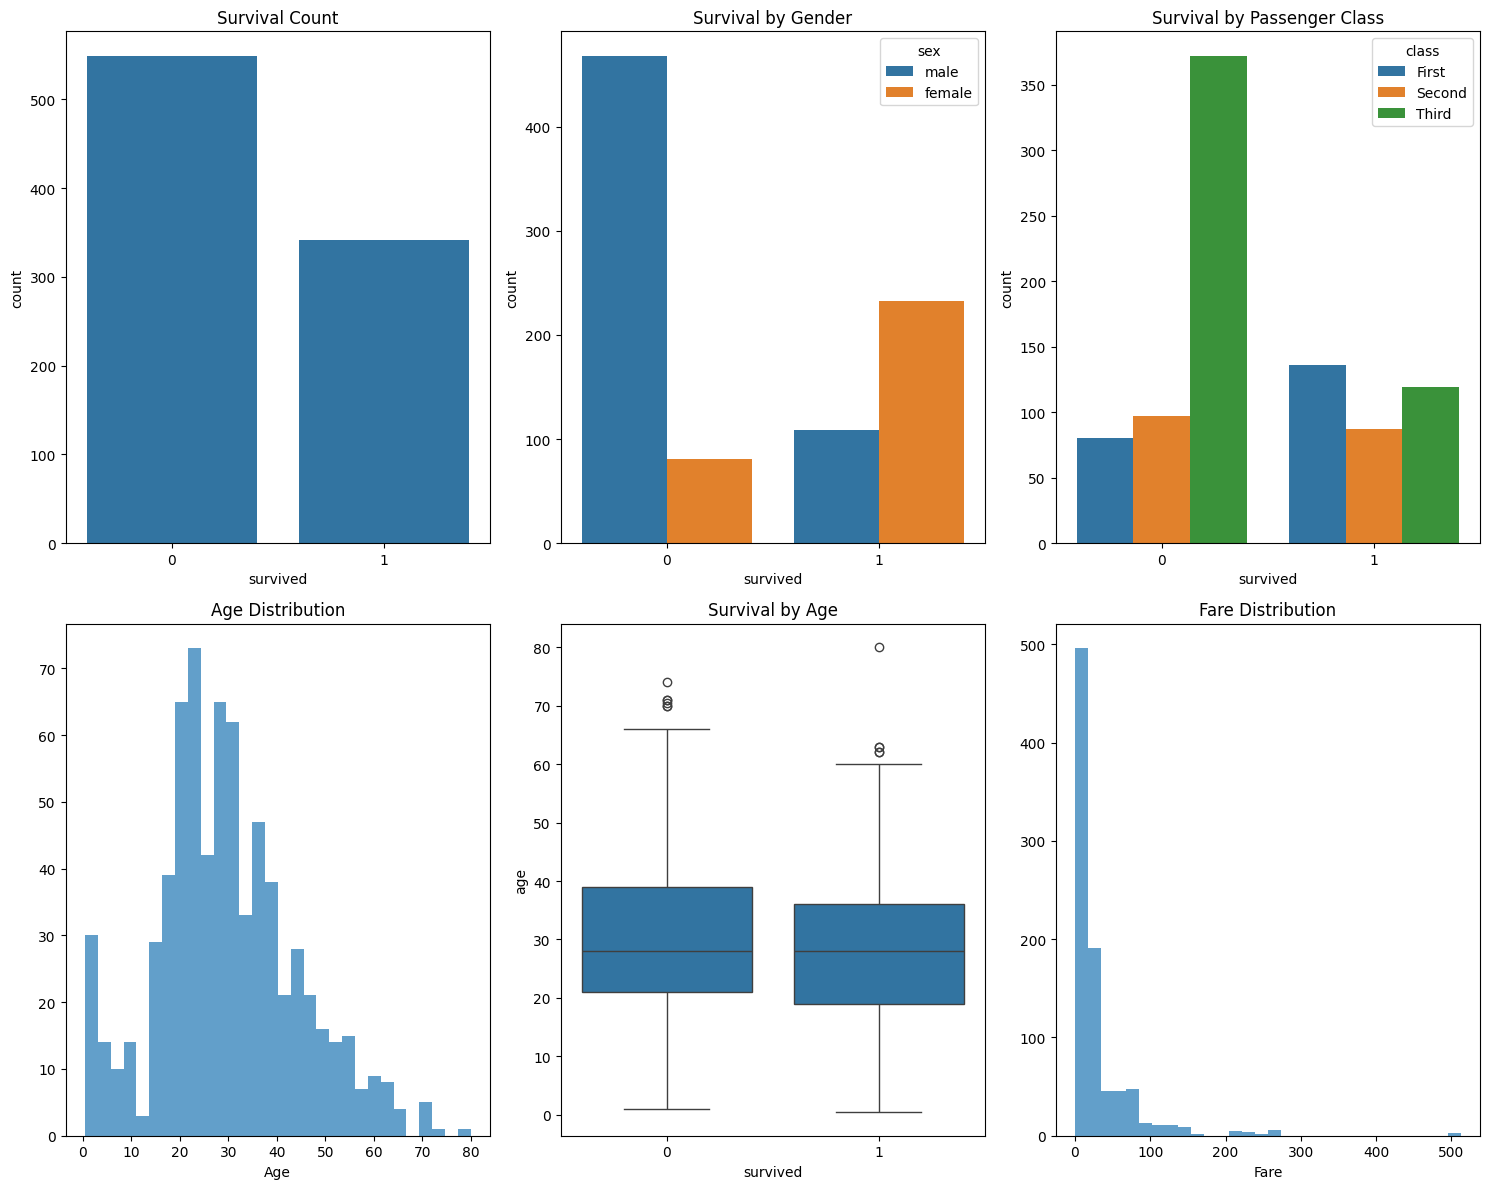


Model Performance:

Random Forest:
Accuracy: 0.8101

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.77      0.72      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179


Logistic Regression:
Accuracy: 0.8101

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179


SVM:
Accuracy: 0.8101

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       110
           1       0.81      0.67      0.73       

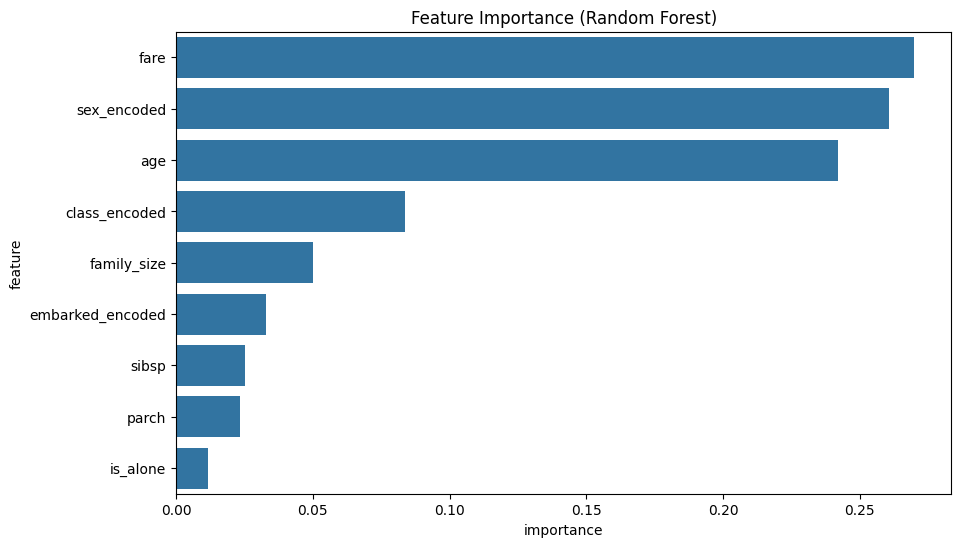


Feature Importance:
            feature  importance
1              fare    0.269915
4       sex_encoded    0.260848
0               age    0.242012
6     class_encoded    0.083834
2       family_size    0.050156
5  embarked_encoded    0.033011
7             sibsp    0.025330
8             parch    0.023251
3          is_alone    0.011642

Example Predictions:
Young female in first class: Survived (Probability: 0.940)
Middle-aged male in third class: Did not survive (Probability: 0.243)
Child with family in second class: Survived (Probability: 0.840)

Model training completed! You can now use the predict_survival() function to make predictions for new passengers.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# If you've already downloaded the dataset using kagglehub, load it
# Otherwise, we'll use the classic Titanic dataset from seaborn
try:
    # Try to load from kagglehub path (adjust path as needed)
    df = pd.read_csv('path/to/your/titanic.csv')
except:
    # Use seaborn's built-in Titanic dataset as fallback
    df = sns.load_dataset('titanic')
    print("Using seaborn's built-in Titanic dataset")

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nSurvival Rate:")
print(df['survived'].value_counts(normalize=True))

# Data Visualization
plt.figure(figsize=(15, 12))

# Survival rate
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='survived')
plt.title('Survival Count')

# Survival by gender
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='survived', hue='sex')
plt.title('Survival by Gender')

# Survival by passenger class
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='survived', hue='class')
plt.title('Survival by Passenger Class')

# Age distribution
plt.subplot(2, 3, 4)
plt.hist(df['age'].dropna(), bins=30, alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')

# Survival by age
plt.subplot(2, 3, 5)
df_temp = df.dropna(subset=['age'])
sns.boxplot(data=df_temp, x='survived', y='age')
plt.title('Survival by Age')

# Fare distribution
plt.subplot(2, 3, 6)
plt.hist(df['fare'].dropna(), bins=30, alpha=0.7)
plt.title('Fare Distribution')
plt.xlabel('Fare')

plt.tight_layout()
plt.show()

# Data Preprocessing
def preprocess_data(df):
    # Create a copy to avoid modifying original data
    data = df.copy()

    # Handle missing values
    data['age'].fillna(data['age'].median(), inplace=True)
    data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)
    data['fare'].fillna(data['fare'].median(), inplace=True)

    # Create new features
    data['family_size'] = data['sibsp'] + data['parch'] + 1
    data['is_alone'] = (data['family_size'] == 1).astype(int)

    # Extract title from name (if name column exists)
    if 'name' in data.columns:
        data['title'] = data['name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
        data['title'] = data['title'].replace(['Lady', 'Countess','Capt', 'Col',
                                               'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                               'Jonkheer', 'Dona'], 'Other')
        data['title'] = data['title'].replace('Mlle', 'Miss')
        data['title'] = data['title'].replace('Ms', 'Miss')
        data['title'] = data['title'].replace('Mme', 'Mrs')

    # Encode categorical variables
    le = LabelEncoder()

    if 'sex' in data.columns:
        data['sex_encoded'] = le.fit_transform(data['sex'])

    if 'embarked' in data.columns:
        data['embarked_encoded'] = le.fit_transform(data['embarked'])

    if 'class' in data.columns:
        data['class_encoded'] = le.fit_transform(data['class'])
    elif 'pclass' in data.columns:
        data['class_encoded'] = data['pclass']

    if 'title' in data.columns:
        data['title_encoded'] = le.fit_transform(data['title'])

    return data

# Preprocess the data
processed_df = preprocess_data(df)

# Select features for modeling
feature_columns = ['age', 'fare', 'family_size', 'is_alone',
                  'sex_encoded', 'embarked_encoded', 'class_encoded']

# Add title if available
if 'title_encoded' in processed_df.columns:
    feature_columns.append('title_encoded')

# Add sibsp and parch if available
if 'sibsp' in processed_df.columns:
    feature_columns.append('sibsp')
if 'parch' in processed_df.columns:
    feature_columns.append('parch')

# Prepare features and target
X = processed_df[feature_columns]
y = processed_df['survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train multiple models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

results = {}

print("\nModel Performance:")
print("="*50)

for name, model in models.items():
    if name == 'Random Forest':
        # Random Forest works well with unscaled data
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        # Other models benefit from scaled data
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Select the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]:.4f}")

# Feature importance (for Random Forest)
if best_model_name == 'Random Forest':
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title('Feature Importance (Random Forest)')
    plt.show()

    print("\nFeature Importance:")
    print(feature_importance)

# Function to predict survival for new passengers
def predict_survival(age, fare, sex, pclass, sibsp=0, parch=0, embarked='S'):
    """
    Predict survival probability for a new passenger

    Parameters:
    - age: Age of passenger
    - fare: Ticket fare
    - sex: 'male' or 'female'
    - pclass: Passenger class (1, 2, or 3)
    - sibsp: Number of siblings/spouses aboard
    - parch: Number of parents/children aboard
    - embarked: Port of embarkation ('S', 'C', or 'Q')
    """

    # Create input dataframe
    input_data = pd.DataFrame({
        'age': [age],
        'fare': [fare],
        'family_size': [sibsp + parch + 1],
        'is_alone': [1 if (sibsp + parch + 1) == 1 else 0],
        'sex_encoded': [1 if sex.lower() == 'male' else 0],
        'embarked_encoded': [0 if embarked == 'C' else (1 if embarked == 'Q' else 2)],
        'class_encoded': [pclass - 1],  # Assuming pclass is 1,2,3 and we need 0,1,2
        'sibsp': [sibsp],
        'parch': [parch]
    })

    # Make sure the input data has the same columns as the training data
    # And in the same order
    input_data = input_data[feature_columns]

    # Make prediction
    if best_model_name == 'Random Forest':
        prediction = best_model.predict(input_data)[0]
        probability = best_model.predict_proba(input_data)[0][1]
    else:
        input_scaled = scaler.transform(input_data)
        prediction = best_model.predict(input_scaled)[0]
        probability = best_model.predict_proba(input_scaled)[0][1]

    return prediction, probability

# Example predictions
print("\nExample Predictions:")
print("="*30)

# Example 1: Young female in first class
pred, prob = predict_survival(age=25, fare=50, sex='female', pclass=1)
print(f"Young female in first class: {'Survived' if pred else 'Did not survive'} (Probability: {prob:.3f})")

# Example 2: Middle-aged male in third class
pred, prob = predict_survival(age=35, fare=10, sex='male', pclass=3)
print(f"Middle-aged male in third class: {'Survived' if pred else 'Did not survive'} (Probability: {prob:.3f})")

# Example 3: Child with family
pred, prob = predict_survival(age=8, fare=25, sex='female', pclass=2, sibsp=1, parch=2)
print(f"Child with family in second class: {'Survived' if pred else 'Did not survive'} (Probability: {prob:.3f})")

print("\nModel training completed! You can now use the predict_survival() function to make predictions for new passengers.")